In [1]:
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
influence_pd=pd.read_csv('influence_data.csv')
artist_pd=pd.read_csv('data_by_artist.csv')
artist_pd=artist_pd.drop(['count'],axis=1)
artist_pd

,artist_name,artist_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity
0,Frank Sinatra,792507,0.384478,0.238017,0.364288,110.181698,-14.271141,1,5,0.735648,0.020855,0.232106,0.049614,189179.9255,26.004383
1,Vladimir Horowitz,119107,0.343210,0.118844,0.225951,94.900679,-23.193418,1,1,0.990070,0.879508,0.183812,0.043360,266541.1251,3.592378
2,Johnny Cash,816890,0.619803,0.449381,0.680662,115.037747,-11.593104,1,10,0.685637,0.022647,0.242243,0.098216,162279.2672,26.614130
3,Billie Holiday,79016,0.572637,0.201368,0.498934,109.912172,-13.225966,1,5,0.908499,0.013064,0.217727,0.062432,185131.4530,15.621005
4,Bob Dylan,66915,0.512598,0.477932,0.551934,126.160149,-11.184330,1,7,0.562567,0.034211,0.308978,0.064535,256713.4203,30.860806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,Natalie La Rose,3359519,0.830000,0.520000,0.735000,104.990000,-8.714000,1,0,0.000792,0.000013,0.065600,0.037600,189907.0000,64.000000
5850,Sarah Ross,3381566,0.721000,0.944000,0.626000,85.002000,-5.982000,1,8,0.013000,0.000000,0.320000,0.159000,262760.0000,52.000000
5851,Rotimi,3410250,0.637000,0.501000,0.431000,103.993000,-6.148000,0,0,0.229000,0.000059,0.099000,0.187000,185461.0000,71.000000
5852,Jillian Jacqueline,3455945,0.547000,0.672000,0.283000,155.791000,-5.023000,1,11,0.304000,0.000000,0.099600,0.049600,213133.0000,58.000000


In [3]:
for col in artist_pd.columns:
    if(col=='artist_name' or col=='artist_id'): continue
    artist_pd[col]=(artist_pd[col]-artist_pd[col].mean())/(artist_pd[col].std())

In [4]:
influence_pd=pd.read_csv('influence_data.csv')
influence_pd

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990
...,...,...,...,...,...,...,...,...
42765,580300,Sufjan Stevens,Pop/Rock,1990,3661738,Rosemary & Garlic,Pop/Rock,2010
42766,261309,Vybz Kartel,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010
42767,467203,Michael Jackson,R&B;,1960,3670556,Trinidad Cardona,R&B;,2010
42768,2518003,Popcaan,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010


In [5]:
influence_pd1=influence_pd[['influencer_id','influencer_main_genre']]
influence_pd1.columns=['artist_id','genre']
influence_pd2=influence_pd[['follower_id','follower_main_genre']]
influence_pd2.columns=['artist_id','genre']
influence_pd1=pd.concat([influence_pd1,influence_pd2],axis=0)
influence_pd1=influence_pd1.groupby('artist_id').agg({
    'genre':'first'
})
influence_pd1

,genre
artist_id,
74,Pop/Rock
335,Pop/Rock
441,Pop/Rock
589,Pop/Rock
1097,Latin
...,...
3639618,Pop/Rock
3659356,Pop/Rock
3661296,Electronic


In [6]:
artist_pd=pd.merge(artist_pd,influence_pd1,on='artist_id',how='left')
artist_pd=artist_pd.dropna(how='any')
artist_pd=artist_pd.reset_index().drop(['index'],axis=1)

In [7]:
df=artist_pd.drop(['artist_name','artist_id'],axis=1)
df=df.groupby('genre').mean()
df=df.drop('Unknown',axis=0)
df.to_csv('genre_centroid.csv')

In [8]:
df

,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity
genre,,,,,,,,,,,,,
Avant-Garde,-0.804260,-1.378018,-0.830215,-0.675320,-2.367950,-0.008188,-0.068383,1.151187,1.590926,-0.519365,-0.169637,1.404900,-0.152531
Blues,0.235812,-0.573191,0.547644,-0.015373,-0.433990,0.052896,-0.036149,0.742088,-0.145735,-0.030541,-0.052411,-0.213936,-0.856164
Children's,0.824257,-0.881107,0.454868,-0.322729,-0.348396,0.466387,-0.359064,1.047156,-0.550510,0.452854,0.254687,-1.181482,-0.758347
Classical,-1.584494,-1.799396,-1.616296,-0.787416,-2.435670,0.093507,-0.095144,1.844207,1.402306,-0.254068,-0.199774,0.716446,-0.995870
Comedy/Spoken,0.004239,0.089672,-0.319976,-0.588858,-0.680175,0.069188,-0.121183,1.135973,-0.432427,2.991708,6.336310,0.288625,-0.830828
Country,0.244664,-0.263093,0.327220,0.101063,-0.007694,0.434003,0.103766,0.316743,-0.387329,-0.105868,-0.307063,-0.542136,-0.118507
Easy Listening,-0.737271,-0.982750,-0.700799,-0.412564,-0.915908,0.239416,-0.158255,1.218985,1.717637,-0.096914,-0.245111,-0.491124,-1.212136
Electronic,0.619929,0.411527,-0.288402,0.009862,0.193103,-0.487326,0.179317,-0.511181,0.934536,-0.043625,0.128799,0.506244,0.739788
Folk,-0.206549,-1.262583,-0.214203,0.057159,-0.995345,0.274059,0.015660,1.312717,-0.230736,-0.056434,-0.068544,-0.388444,-0.826408


In [147]:
seed=2020
clf = KMeans(n_clusters=4, random_state=seed)
clf.fit(df)

KMeans(n_clusters=4, random_state=2020)

In [148]:
print(clf.labels_)

[3 0 0 3 2 1 0 1 0 0 0 1 3 1 1 1 1 3 0]


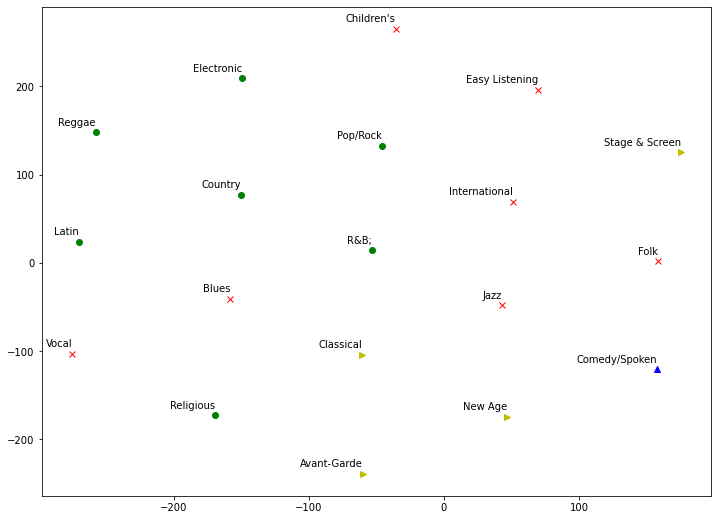

In [187]:
# tsne=TSNE()
# tsne.fit_transform(df)
# tsne=pd.DataFrame(tsne.embedding_,index=df.index).reset_index()
plt.figure(figsize=(12,9))
df2=df.reset_index()
labels=clf.labels_
color=['r','g','b','y']
mark=['x','o','^','>']
for i in range(df2.shape[0]):
    plt.plot(tsne.loc[i][0],tsne.loc[i][1],color[labels[i]]+mark[labels[i]])
    plt.text(tsne.loc[i][0],tsne.loc[i][1]+8,df2.loc[i].genre,horizontalalignment='right')
plt.savefig('聚类.png')